In [32]:
import numpy as np

# data
cl=1000
samples = 50
states = np.linspace(0, cl, samples+1)

np.random.seed(123)

#root height - internal node height
x = np.random.uniform(0, 1, size=samples)
#internal node height
y = np.random.uniform(0, 1, size=samples)
# rm 0 state
if len(states) == len(x) + 1:
    states = np.delete(states, 0)

print("chain length = ", cl, "; sample size = ", samples)
print("len(states)", len(states), "== len(x)", len(x), "is", len(states) == len(x))
#print("states = ", states)
#print("x = ", x)

chain length =  1000 ; sample size =  50
len(states) 50 == len(x) 50 is True


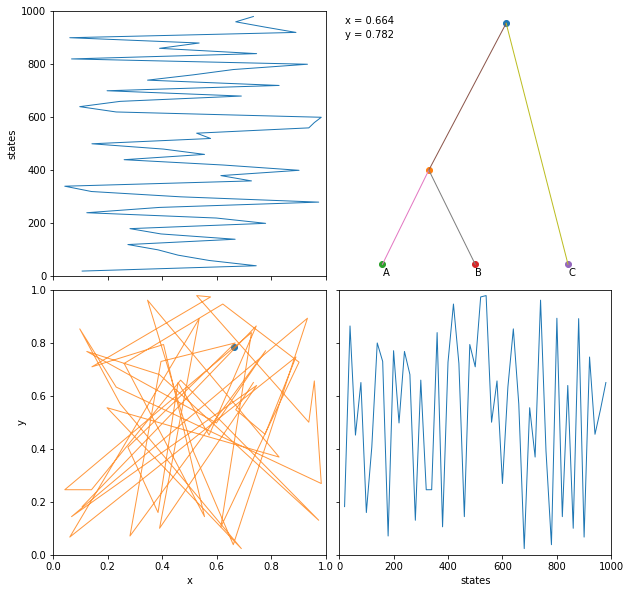

In [36]:
#http://twiecki.github.io/blog/2014/01/02/visualizing-mcmc/
import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure(figsize=(10,10))
x_width = (0, 1)
y_width = (0, 1)
xy_width = (-0.1, 2.1)
states_width = (0, cl)
ax1 = fig.add_subplot(221, xlim=x_width, ylim=states_width, ylabel='states')
ax2 = fig.add_subplot(224, xlim=states_width, ylim=y_width, xlabel='states')
ax3 = fig.add_subplot(223, xlim=x_width, ylim=y_width, xlabel='x', ylabel='y')
# the tree plan
ax4 = fig.add_subplot(222, xlim=xy_width, ylim=xy_width)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax4.axis('off')

line1, = ax1.plot([], [], lw=1)
line2, = ax2.plot([], [], lw=1)
# dot
line3, = ax3.plot([], [], 'o', lw=3)
line4, = ax3.plot([], [], lw=1, alpha=.8)
# tree (A,(B,C))
node1, = ax4.plot([], [], 'o', lw=2)
node2, = ax4.plot([], [], 'o', lw=3)
node3, = ax4.plot([], [], 'o', lw=2)
node4, = ax4.plot([], [], 'o', lw=2)
node5, = ax4.plot([], [], 'o', lw=2)
edge12, = ax4.plot([], [], lw=1)
edge23, = ax4.plot([], [], lw=1)
edge24, = ax4.plot([], [], lw=1)
edge15, = ax4.plot([], [], lw=1)
lines = [line1, line2, line3, line4, edge12, edge23, edge24, edge15, 
         node1, node2, node3, node4, node5]
# text
x_text = ax4.text(0.02, 0.95, '', transform=ax4.transAxes)
y_text = ax4.text(0.02, 0.90, '', transform=ax4.transAxes)

def init():
    for line in lines:
        line.set_data([], [])
    #x_text.set_text('')
    #y_text.set_text('')
    return lines

Ax = 0.25
Bx = 1.0
Cx = 1.75
Node2x = 0.625
Rootx = 1.25
ax4.annotate('A', (Ax, -0.1))
ax4.annotate('B', (Bx, -0.1))
ax4.annotate('C', (Cx, -0.1))
def animate(i):
    line1.set_data(x[:i], states[:i])
    line2.set_data(states[:i], y[:i])
    line3.set_data(x[i], y[i])
    line4.set_data(x[:i], y[:i])
    #tree 
    node1.set_data(Rootx, 2) # root
    node2.set_data(Node2x, y[i]) 
    node3.set_data(Ax, 0) # A
    node4.set_data(Bx, 0) # B
    node5.set_data(Cx, 0) # C
    edge12.set_data([Rootx, Node2x], [2, y[i]])
    edge23.set_data([Node2x, Ax], [y[i], 0])
    edge24.set_data([Node2x, Bx], [y[i], 0])
    edge15.set_data([Rootx, Cx], [2, 0])
    # text
    x_text.set_text('x = %.3f' % x[i])
    y_text.set_text('y = %.3f' % y[i])
    return lines

# interval : Delay between frames in milliseconds. Defaults to 200.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=samples, 
                               interval=5, blit=True, repeat=True)

anim.save('uniformXYTree.mp4', fps=1, extra_args=['-vcodec', 'libx264'])
plt.show()